## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [2]:
data=pd.read_csv(r"C:\Users\VivekSharma\Downloads\analytics vidya hackathon\train_LZdllcl.csv")
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [138]:
testing_data=pd.read_csv(r"C:\Users\VivekSharma\Downloads\analytics vidya hackathon\test_2umaH9m.csv")

In [3]:
data.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.00,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


## Exploratory Data analysis

### Univariate data anlaysis

In [6]:
cat_col=data.select_dtypes(include=np.object).columns
num_col=data.select_dtypes(include=np.number).columns

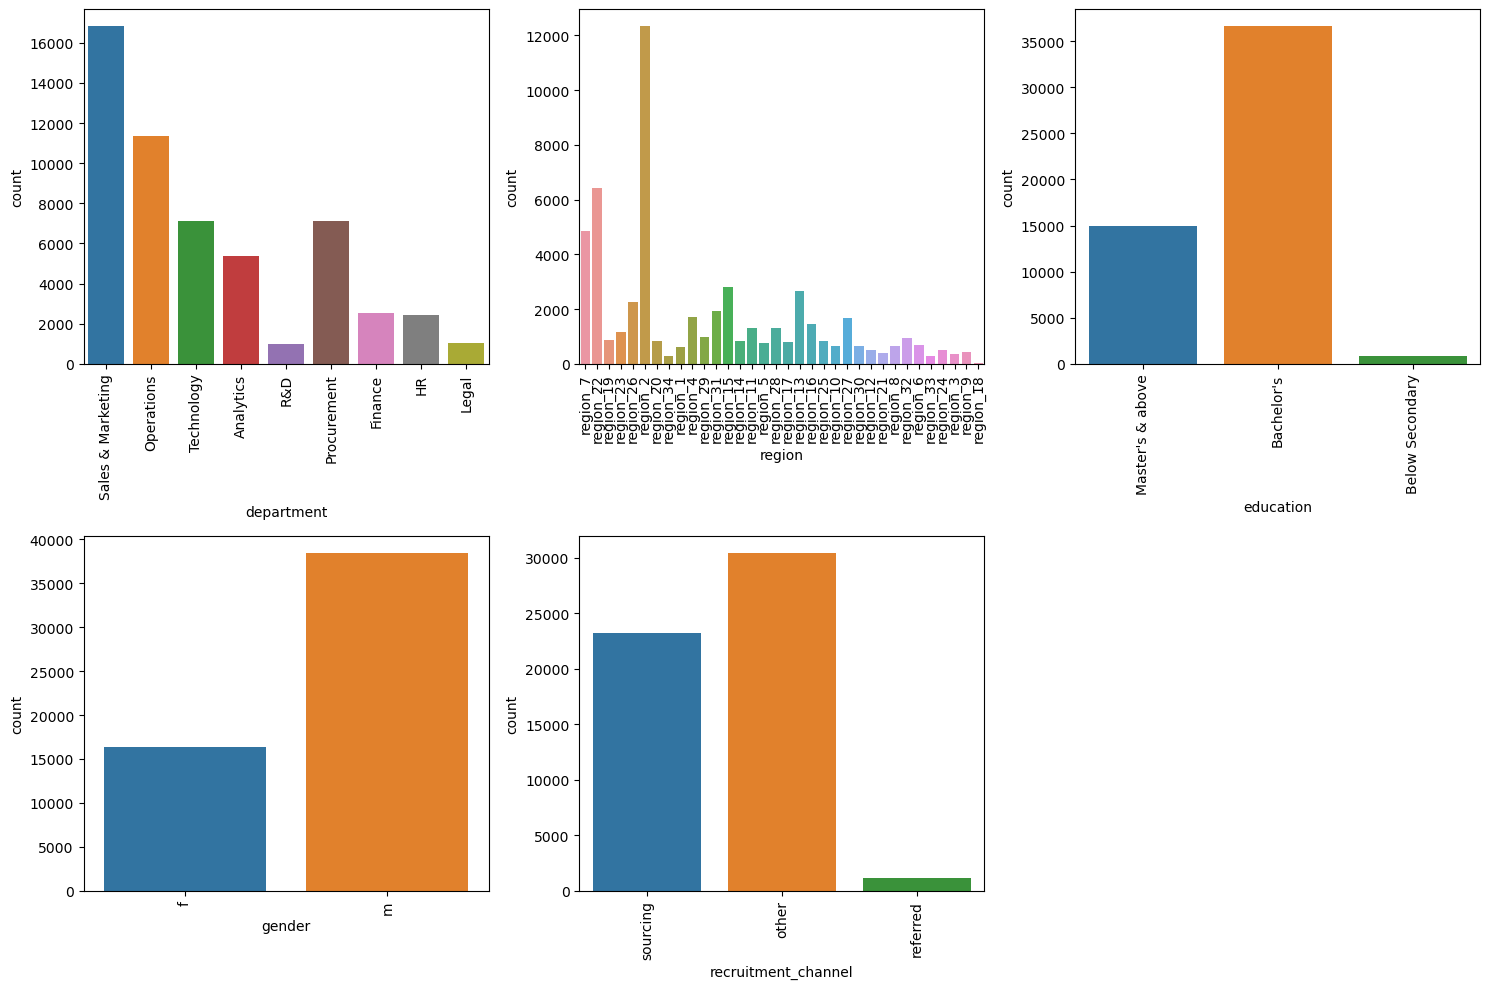

In [7]:
t=1
plt.figure(figsize=[15,10])
for i in cat_col:
    plt.subplot(2,3,t)
    sns.countplot(x=data[i])
    plt.xticks(rotation=90)
    t=t+1
plt.tight_layout()
plt.show()

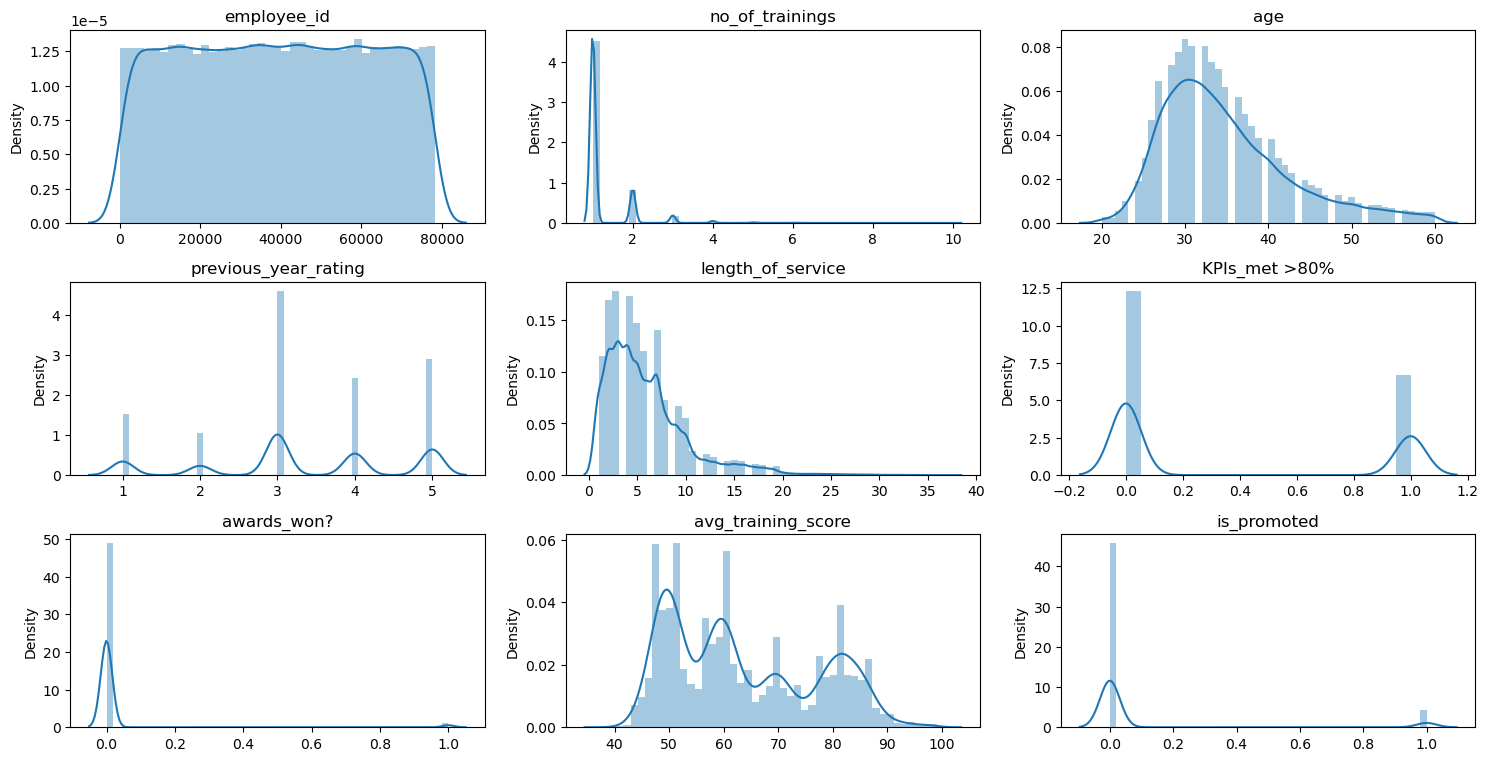

In [8]:
t=1
plt.figure(figsize=[15,10])
for i in num_col:
    plt.subplot(4,3,t)
    sns.distplot(x=data[i])
    plt.title(i)
    t=t+1
plt.tight_layout()
plt.show()

### Analysis from Univariate 
* Due to existance of various department, its better if group them to make model simplified but it will result into lost of info
* Region column should be bucketed using quantile- make a boxplot of count of regions
* Id should be removed

### Bivariate analysis

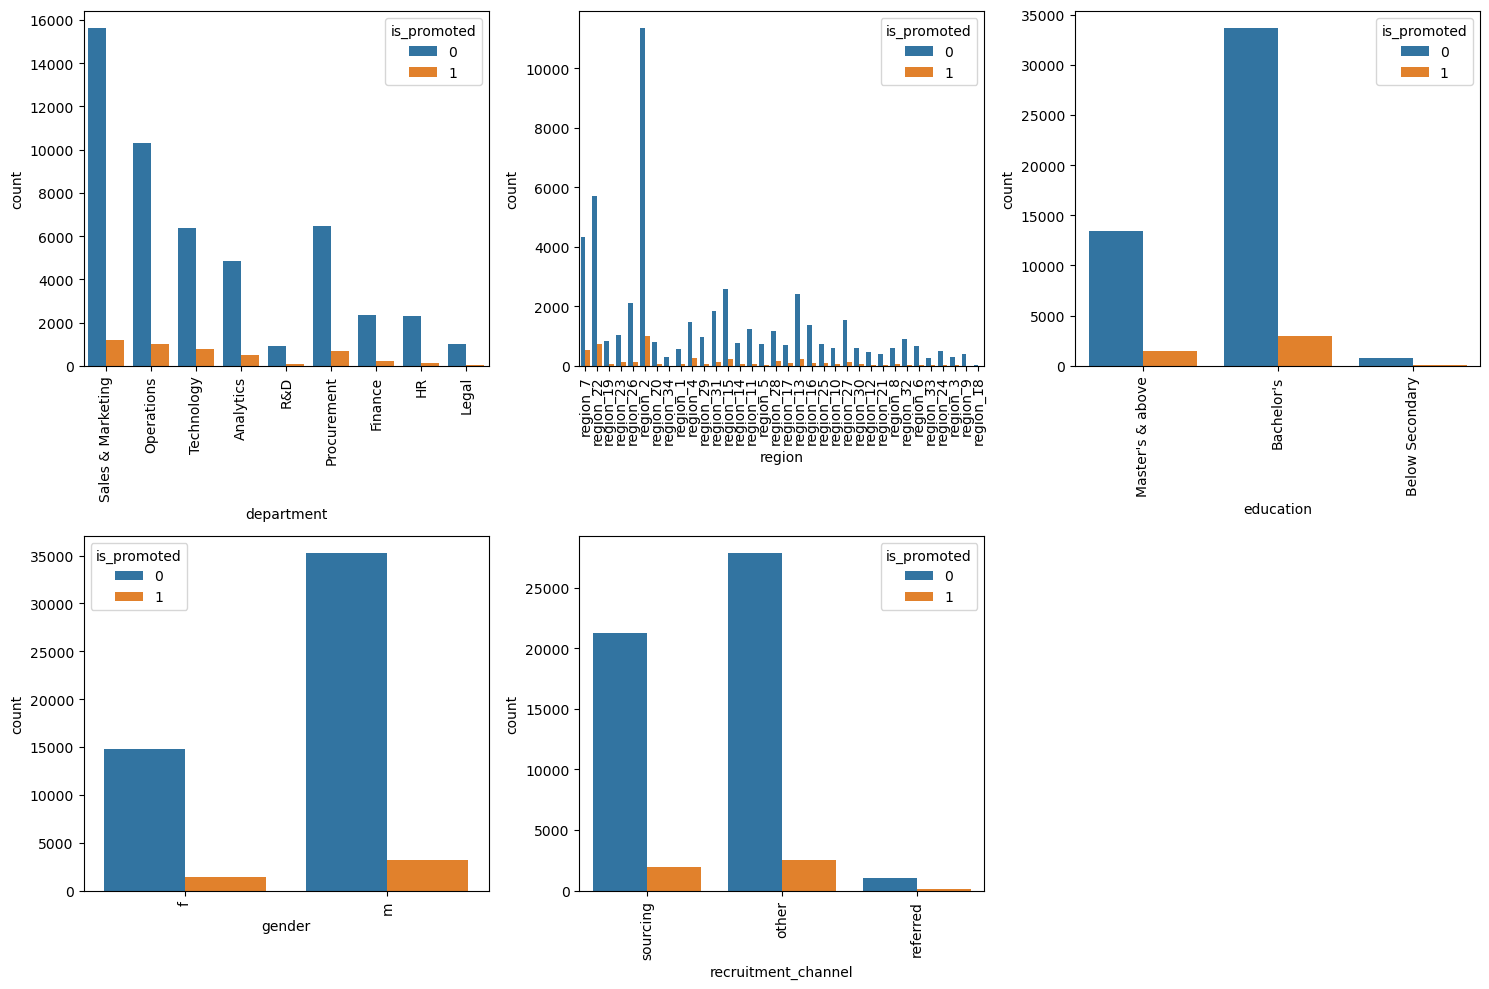

In [9]:
t=1
plt.figure(figsize=[15,10])
for i in cat_col:
    plt.subplot(2,3,t)
    sns.countplot(x=data[i],hue=data.is_promoted)
    plt.xticks(rotation=90)
    t=t+1
plt.tight_layout()
plt.show()

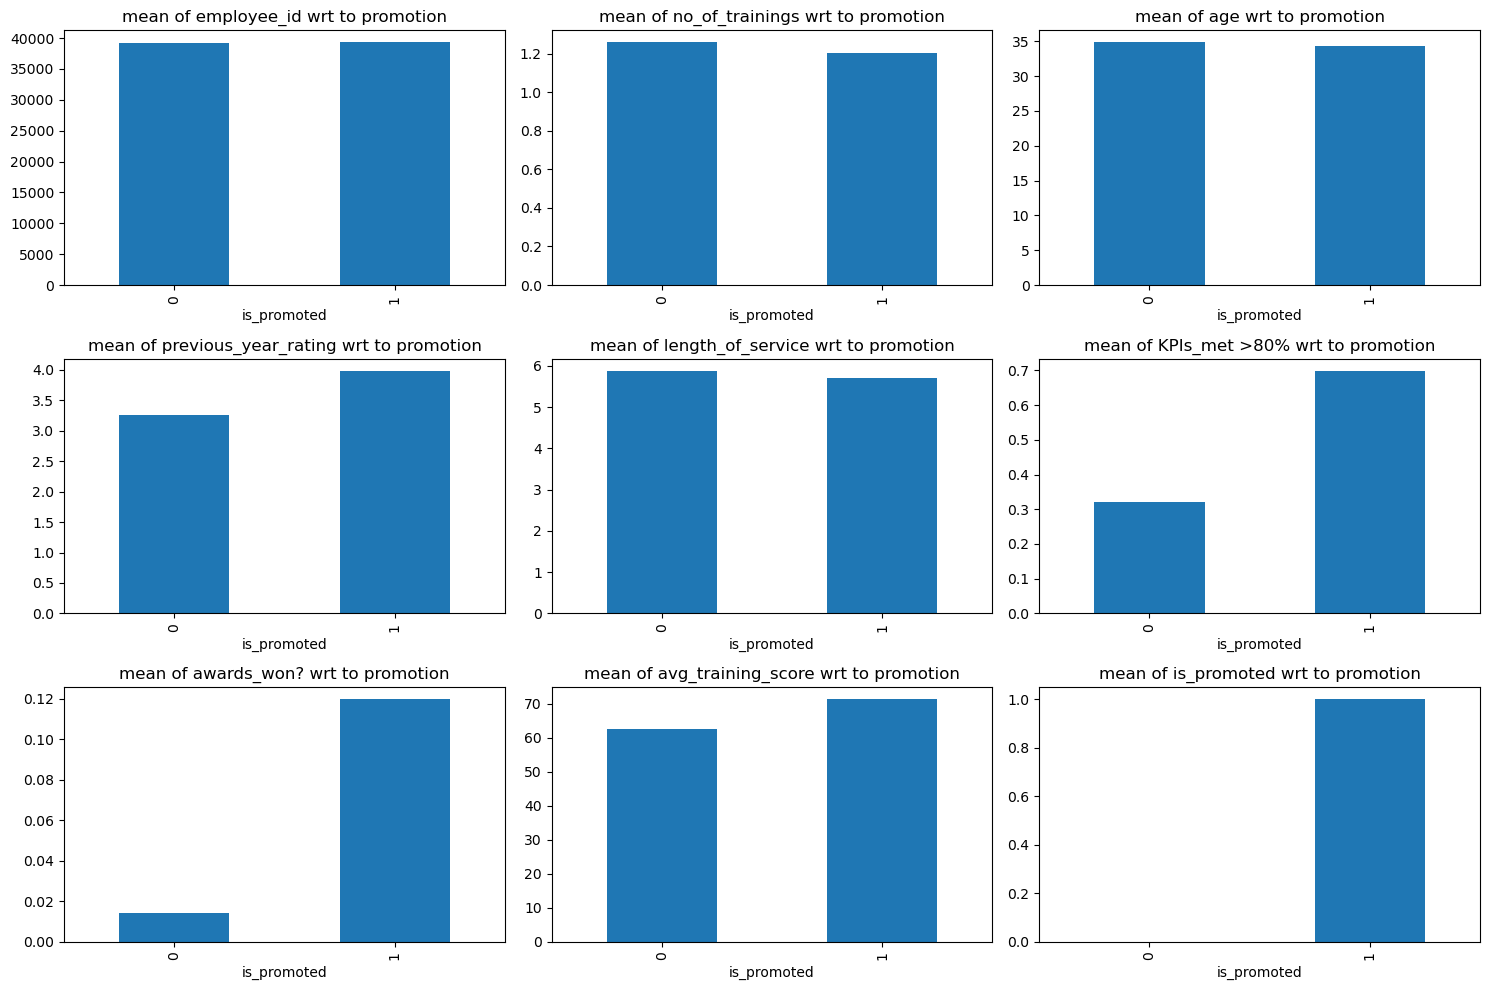

In [10]:
t=1
plt.figure(figsize=[15,10])
for i in num_col:
    plt.subplot(3,3,t)
    data.groupby('is_promoted')[i].mean().plot(kind='bar')
    plt.title(f'mean of {i} wrt to promotion')
    t=t+1
plt.tight_layout()
plt.show()

### Analysis from Bivariate
* Its better to bucket deparments on the basis of promotion
* same for region
* KPI met,awards win, previous year rating are important variable for promotion

## Exploratory Data Analysis

### Missing Value Treatment

In [11]:
data.dropna(inplace=True)

### Departments

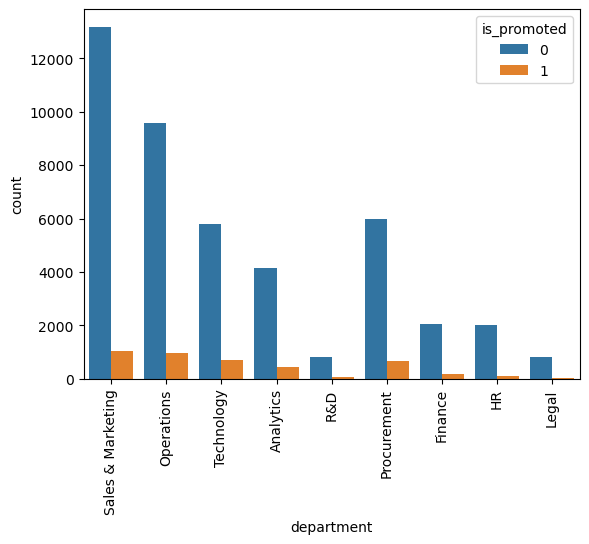

In [12]:
sns.countplot(x=data.department,hue=data.is_promoted)
plt.xticks(rotation=90)
plt.show()

In [13]:
print(data.department.value_counts()[data.department.value_counts()>=data.department.value_counts().median()])
dept_grp_a=data.department.value_counts()[data.department.value_counts()>=data.department.value_counts().median()].index

Sales & Marketing    14239
Operations           10547
Procurement           6641
Technology            6502
Analytics             4610
Name: department, dtype: int64


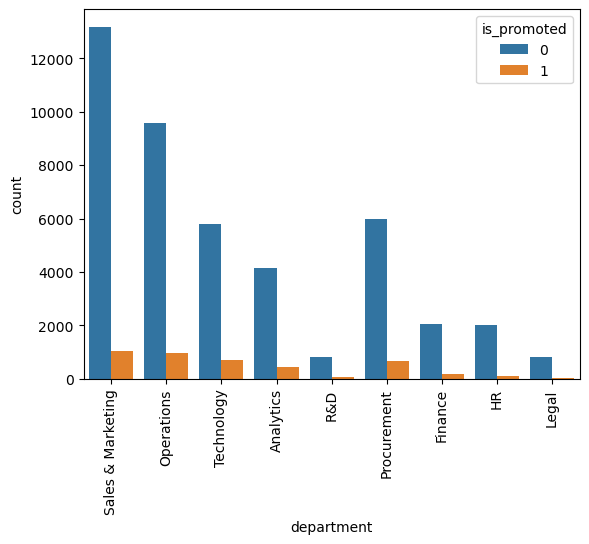

In [14]:
sns.countplot(x=data['department'],hue=data.is_promoted)
plt.xticks(rotation=90)
plt.show()

In [15]:
data.loc[data.department.isin(dept_grp_a),'department']='dept_group_a'

In [139]:
testing_data.loc[testing_data.department.isin(dept_grp_a),'department']='dept_group_a'

In [16]:
data.loc[data.department!='dept_group_a','department']='dept_group_b'

In [140]:
testing_data.loc[testing_data.department!='dept_group_a','department']='dept_group_b'

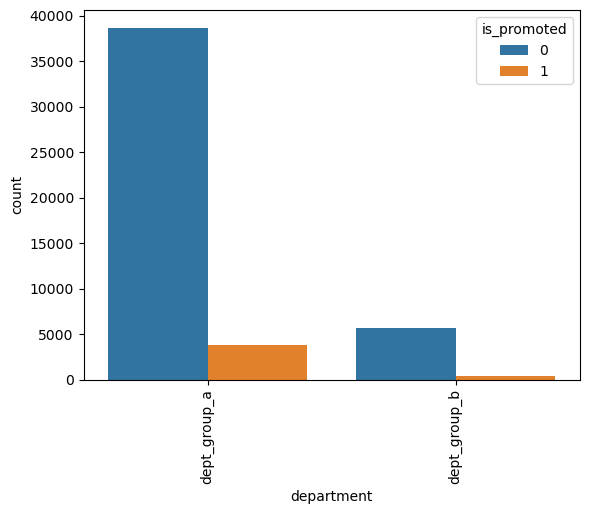

In [17]:
sns.countplot(x=data.department,hue=data.is_promoted)
plt.xticks(rotation=90)
plt.show()

### Region

In [18]:
print(data.region.value_counts()[data.region.value_counts()>data.region.value_counts().median()])
region_grp_a=data.region.value_counts()[data.region.value_counts()>data.region.value_counts().median()].index

region_2     10811
region_22     5435
region_7      4397
region_15     2512
region_13     2463
region_26     1966
region_31     1692
region_4      1626
region_27     1418
region_16     1319
region_11     1189
region_28     1143
region_23     1104
region_29      896
region_19      838
region_20      780
region_32      773
Name: region, dtype: int64


In [19]:
region_grp_a

Index(['region_2', 'region_22', 'region_7', 'region_15', 'region_13',
       'region_26', 'region_31', 'region_4', 'region_27', 'region_16',
       'region_11', 'region_28', 'region_23', 'region_29', 'region_19',
       'region_20', 'region_32'],
      dtype='object')

In [21]:
region_grp_a=data.region.value_counts()[data.region.value_counts()>=data.region.value_counts().quantile(0.75)].index
region_grp_b=data.region.value_counts()[(data.region.value_counts()<data.region.value_counts().quantile(0.75))
                                       & (data.region.value_counts()>=data.region.value_counts().quantile(0.5)) ].index
region_grp_c=data.region.value_counts()[data.region.value_counts()<data.region.value_counts().quantile(0.5)].index

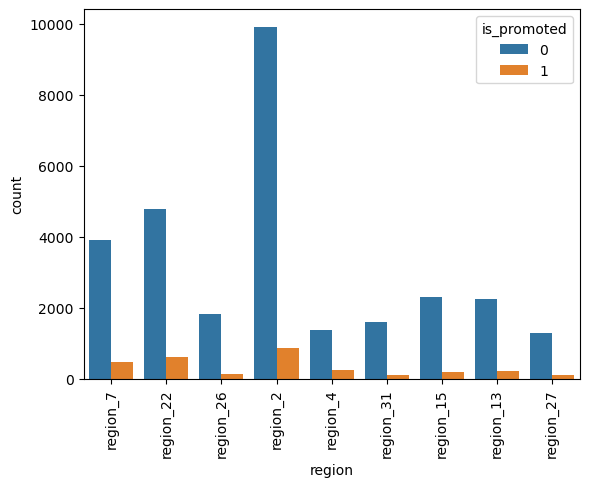

In [22]:
sns.countplot(x=data.loc[data.region.isin(region_grp_a),'region'],hue=data.is_promoted)
plt.xticks(rotation=90)
plt.show()

In [23]:
data.loc[data.region.isin(region_grp_a),'region']='region_grp_a'
data.loc[data.region.isin(region_grp_b),'region']='region_grp_b'
data.loc[data.region.isin(region_grp_c),'region']='region_grp_c'

In [141]:
testing_data.loc[testing_data.region.isin(region_grp_a),'region']='region_grp_a'
testing_data.loc[testing_data.region.isin(region_grp_b),'region']='region_grp_b'
testing_data.loc[testing_data.region.isin(region_grp_c),'region']='region_grp_c'

In [24]:
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,dept_group_a,region_grp_a,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,dept_group_a,region_grp_a,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,dept_group_a,region_grp_b,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,dept_group_a,region_grp_b,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,dept_group_a,region_grp_a,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,6915,dept_group_a,region_grp_c,Bachelor's,m,other,2,31,1.0,2,0,0,49,0
54803,3030,dept_group_a,region_grp_c,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,dept_group_a,region_grp_a,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,dept_group_a,region_grp_c,Bachelor's,m,other,1,27,5.0,3,1,0,79,0


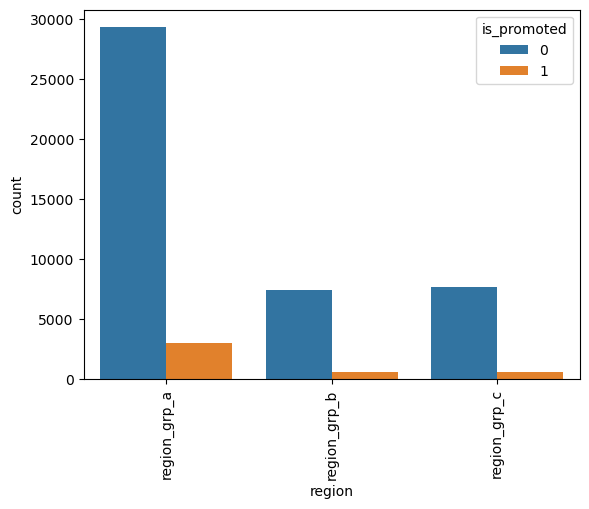

In [25]:
sns.countplot(x=data.region,hue=data.is_promoted)
plt.xticks(rotation=90)
plt.show()

In [27]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,dept_group_a,region_grp_a,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,dept_group_a,region_grp_a,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,dept_group_a,region_grp_b,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,dept_group_a,region_grp_b,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,dept_group_a,region_grp_a,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


## Encoding

In [28]:
data.drop('employee_id',axis=1,inplace=True)

In [142]:
testing_data.drop('employee_id',axis=1,inplace=True)

### Frequency encoding

In [30]:
l=['department','region','education','gender','recruitment_channel']
for i in l:
    freq=data[i].value_counts()/len(data)
    data[i]=data[i].map(freq)

In [143]:
l=['department','region','education','gender','recruitment_channel']
for i in l:
    freq=testing_data[i].value_counts()/len(testing_data)
    testing_data[i]=testing_data[i].map(freq)

## Train test split

In [93]:
from sklearn.model_selection import train_test_split
X=data.drop('is_promoted',axis=1)
y=data.is_promoted
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,stratify=y)

In [144]:
l=['age','no_of_trainings','previous_year_rating','length_of_service','avg_training_score']
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
for i in l:
    xtrain.loc[:,i]=ss.fit_transform(pd.DataFrame(xtrain.loc[:,i]))
    xtest.loc[:,i]=ss.transform(pd.DataFrame(xtest.loc[:,i]))
    testing_data.loc[:,i]=ss.transform(pd.DataFrame(testing_data.loc[:,i]))


In [105]:
from imblearn.over_sampling import SMOTE
s=SMOTE()
x_train_s,y_train_s=s.fit_resample(xtrain,ytrain)

In [106]:
y_train_s.value_counts()

0    35542
1    35542
Name: is_promoted, dtype: int64

## ANN

In [96]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
import kerastuner as kt

In [125]:
def build_model(hp):
    model=Sequential()
    counter=0
    for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
        if counter==0:
            model.add(
                Dense(
                    hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
                    activation=hp.Choice('activation'+str(i),values=['relu','tanh','sigmoid']),
                    input_dim=12
                    )
                )
            model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6])))
        else:
            model.add(
                Dense(
                    hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
                    activation=hp.Choice('activation'+str(i),values=['relu','tanh','sigmoid'])
                    )
                )
            model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6])))
        counter+=1
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(optimizer=hp.Choice('optimizer',values=['rmsprop','adam','sgd','nadam','adadelta'])
                 ,loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model
    
tunner=kt.RandomSearch(build_model,objective='val_loss',max_trials=3,directory='mydir2',project_name='5')
    
tunner.search(x_train_s,y_train_s,epochs=5,validation_data=(xtest,ytest))

Trial 3 Complete [00h 00m 37s]
val_loss: 0.515279233455658

Best val_loss So Far: 0.4367505609989166
Total elapsed time: 00h 01m 42s


In [126]:
model=tunner.get_best_models(num_models=1)[0]

In [127]:
from keras.callbacks import EarlyStopping
callback=EarlyStopping(monitor='val_loss',
                       min_delta=0.0001,
                       patience=20,
                       verbose=1,
                       mode='auto',
                       baseline=None,
                       restore_best_weights=False)

In [128]:
history=model.fit(x_train_s,y_train_s,epochs=200,initial_epoch=6,validation_data=(xtest,ytest),verbose=0,callbacks=callback)

Epoch 86: early stopping


In [129]:
tr_l,tr_a=model.evaluate(xtrain,ytrain,verbose=0)
ts_l,ts_a=model.evaluate(xtest,ytest,verbose=0)
print('train loss : ',tr_l,'    ','accuracy : ',tr_a)
print('test loss : ',ts_l,'    ','accuracy : ',ts_a)

train loss :  0.4242255389690399      accuracy :  0.7052507400512695
test loss :  0.4282020330429077      accuracy :  0.7048910856246948


In [130]:
from sklearn.metrics import classification_report,confusion_matrix
def score(act,pred):
    print('cf',confusion_matrix(act,pred))
    print('cr',classification_report(act,pred))
pred_prob=model.predict(xtest)
pred=np.array(list(map(lambda x: 1 if x > 0.5 else 0, pred_prob)))
score(ytest,pred)

305/305 [==============================] - 0s 1ms/step
cf [[6162 2724]
 [ 148  698]]
cr               precision    recall  f1-score   support

           0       0.98      0.69      0.81      8886
           1       0.20      0.83      0.33       846

    accuracy                           0.70      9732
   macro avg       0.59      0.76      0.57      9732
weighted avg       0.91      0.70      0.77      9732



In [158]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train_s,y_train_s)
pred=model.predict(xtest)
score(ytest,pred)

cf [[8641  245]
 [ 650  196]]
cr               precision    recall  f1-score   support

           0       0.93      0.97      0.95      8886
           1       0.44      0.23      0.30       846

    accuracy                           0.91      9732
   macro avg       0.69      0.60      0.63      9732
weighted avg       0.89      0.91      0.89      9732



In [123]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import recall_score,precision_score,f1_score
l=[]
for i in ['LogisticRegression','KNeighborsClassifier','GaussianNB','DecisionTreeClassifier','RandomForestClassifier','XGBClassifier']:
    params={'RandomForestClassifier':
                {'n_estimators':[400,600,700,1000],'max_depth':[4,5,6,7,8],'criterion':['entropy']},
            'KNeighborsClassifier':
                {'n_neighbors': [3, 5, 7],'weights': ['uniform', 'distance'],'p': [1, 2]},
            'DecisionTreeClassifier':
                {'criterion': ['gini', 'entropy'],'max_depth': [None, 5, 10, 15],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]},
            'LogisticRegression':
                {'penalty': ['l1', 'l2', 'elasticnet', 'none'],'C': [0.001, 0.01, 0.1, 1, 10, 100],'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'max_iter': [50, 100, 200]},
            'GaussianNB': 
                {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]},
            'XGBClassifier':
                {'learning_rate': [0.01, 0.1, 0.2],'n_estimators': [50, 100, 200],'max_depth': [3, 4, 5],'subsample': [0.8, 1.0],'colsample_bytree': [0.8, 1.0]}  
            }
                                   
    gscv=GridSearchCV(estimator=globals()[i](),param_grid=params[i],scoring='f1',cv=3,verbose=0)
    gscv.fit(x_train_s,y_train_s)
    model=globals()[i](**gscv.best_params_)
    model.fit(x_train_s,y_train_s)
    y_pred=model.predict(xtest)
    l.append({
        'model':i,
        'recall':recall_score(ytest,y_pred),
        'precision':precision_score(ytest,y_pred),
        'f1_score':f1_score(ytest,y_pred)
    })

In [124]:
import pandas as pd
pd.DataFrame(l).sort_values('recall',ascending=False)

,model,recall,precision,f1_score
2,GaussianNB,0.724586,0.180400,0.288878
0,LogisticRegression,0.713948,0.193838,0.304897
4,RandomForestClassifier,0.653664,0.226546,0.336477
1,KNeighborsClassifier,0.379433,0.236029,0.291024
3,DecisionTreeClassifier,0.274232,0.319559,0.295165
5,XGBClassifier,0.200946,0.735931,0.315692
